In [94]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
X_MIN = 0
X_MAX = 100
Y_MIN = 0
Y_MAX = 100

In [60]:
class Point_2D():  
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return str(self.x) + "," + str(self.y)
        

In [65]:
class Body():
    def __init__(self, point, mass):
        self.position = point
        self.mass = mass
        
    def __str__(self):
        return "{ position : " + str(self.position) + "   " + "mass : " + str(self.mass) + "}"

In [63]:
class Area():
    def __init__(self, point, length):
        self.position = point
        self.length = length
    
    def __str__(self):
        return "{position : " + str(self.position) + "  " + "length : " + str(self.length) + "}"
        

insert{ position : 1.0,3.0   mass : 1000.0}
50.0 50.0
False
False
node : {area : {position : 0,0  length : 50.0} body : None}
to 0
in -1
insert{ position : 1.0,4.0   mass : 2000.0}
50.0 50.0
False
False
node : {area : {position : 0,0  length : 50.0} body : { position : 1.0,3.0   mass : 1000.0}}
to 0
in 0
25.0 25.0
False
False
node : {area : {position : 0,0  length : 25.0} body : None}
to 0
in -1
25.0 25.0
False
False
node : {area : {position : 0,0  length : 25.0} body : { position : 1.0,3.0   mass : 1000.0}}
to 0
in 0
12.5 12.5
False
False
node : {area : {position : 0,0  length : 12.5} body : None}
to 0
in -1
12.5 12.5
False
False
node : {area : {position : 0,0  length : 12.5} body : { position : 1.0,3.0   mass : 1000.0}}
to 0
in 0
6.25 6.25
False
False
node : {area : {position : 0,0  length : 6.25} body : None}
to 0
in -1
6.25 6.25
False
False
node : {area : {position : 0,0  length : 6.25} body : { position : 1.0,3.0   mass : 1000.0}}
to 0
in 0
3.125 3.125
False
False
node : {area : {

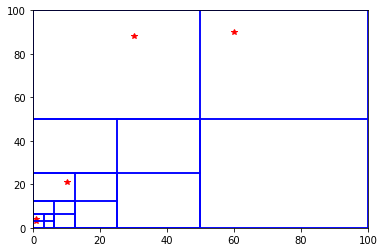

In [116]:
class Node():
    def __init__(self, area):
        self.status = -1
        self.body = None
        self.area = area
        self.children = None
        self.centerOfMass = None
        self.total_mass = 0
        
    def __str__(self):
        return "node : " + "{area : " + str(self.area) + " body : " + str(self.body) + "}"
        
    '''
    ------------------------------------------
    |                          |                          |
    |                          |                          |          
    |           0            |            1            |          
    |                          |                          |          
    |                          |                          |          
   -------------------------------------------
    |                          |                          |          
    |                          |                          |          
    |            2            |            3           |          
    |                          |                          |          
    |                          |                          |          
   -------------------------------------------
    '''
        
    def calcPartition(self, inserted_body):
        center = Point_2D(self.area.position.x + self.area.length/2, self.area.position.y + self.area.length/2)
        print(center.x, center.y)
        print(inserted_body.position.x > center.x)
        print(inserted_body.position.y > center.y)
        return (int(inserted_body.position.x > center.x) << 1)  + int(inserted_body.position.y > center.y)
    
    def updateCenterOfMass(self):
        total_mass = 0
        total_mass_times_position_x = 0
        total_mass_times_position_y = 0
        
        
        for child in self.children:
            if child.status != -1:
                total_mass += child.total_mass
                total_mass_times_position_x += child.centerOfMass.x * child.total_mass
                total_mass_times_position_y += child.centerOfMass.y * child.total_mass
            
        res = Point_2D(total_mass_times_position_x / total_mass, total_mass_times_position_y / total_mass)
        
        return [res, total_mass]

        
    def insert(self, inserted_body):
        partition_idx = self.calcPartition(inserted_body)
            
        next_node = self.children[partition_idx]
        print(next_node)
        print("to" , partition_idx)

        if next_node.status == -1:
            print("in -1")
            next_node.status = 0
            next_node.body = inserted_body
            next_node.centerOfMass = inserted_body.position
            next_node.total_mass = inserted_body.mass
            self.centerOfMass = self.updateCenterOfMass()[0]
            self.total_mass = self.updateCenterOfMass()[1]
            return
            
        elif next_node.status == 0:
            print("in 0")
            next_node.status = 1
            next_node.children = [Node(None) , Node(None), Node(None) , Node(None)]
            half = next_node.area.length / 2
            next_node.children[0].area = Area(Point_2D(next_node.area.position.x, next_node.area.position.y),  half)
            next_node.children[1].area = Area(Point_2D(next_node.area.position.x + half, next_node.area.position.y), half)
            next_node.children[2].area = Area(Point_2D(next_node.area.position.x, next_node.area.position.y + half), half)
            next_node.children[3].area = Area(Point_2D(next_node.area.position.x + half, next_node.area.position.y + half), half)
            
            next_node.insert(next_node.body)
            next_node.insert(inserted_body)
            
            next_node.body = None
            self.centerOfMass = self.updateCenterOfMass()[0]
            self.total_mass = self.updateCenterOfMass()[1]
            return
            
        else:
            print("in 1")
            next_node.insert(inserted_body)
            self.centerOfMass = self.updateCenterOfMass()[0]
            self.total_mass = self.updateCenterOfMass()[1]
            return

        
        
    def space_plot(self):
         
        if self.children != None:
            for child in self.children:
                    child.space_plot()
       
        if self.body != None:
            plt.plot(self.body.position.x, self.body.position.y, color = 'red')
            
        plt.plot([self.area.position.x, self.area.position.x + self.area.length], 
                      [self.area.position.y, self.area.position.y], color = "blue")
        
        plt.plot([self.area.position.x, self.area.position.x], 
                      [self.area.position.y, self.area.position.y + self.area.length], color = "blue")
        
        plt.plot([self.area.position.x + self.area.length, self.area.position.x + self.area.length] ,
                      [self.area.position.y, self.area.position.y + self.area.length], color = "blue")
        
        plt.plot([self.area.position.x, self.area.position.x  + self.area.length] , 
                      [self.area.position.y + self.area.length, self.area.position.y  + self.area.length], color = "blue")
        
            
        
        
if __name__ == '__main__':
    bodies = []
    with open('input.dat', 'r') as fin:
        for line in fin:
            tmp = list(map(float, line.split()))
            body = Body(Point_2D(tmp[0], tmp[1]), tmp[2])
            bodies.append(body)
            
    root = Node(area = Area(Point_2D(X_MIN, Y_MIN) , X_MAX - X_MIN))
    root.status = 1
    root.children = [Node(None) , Node(None), Node(None) , Node(None)] 
    half = root.area.length / 2
    root.children[0].area = Area(Point_2D(root.area.position.x, root.area.position.y),  half)
    root.children[1].area = Area(Point_2D(root.area.position.x + half, root.area.position.y), half)
    root.children[2].area = Area(Point_2D(root.area.position.x, root.area.position.y + half), half)
    root.children[3].area = Area(Point_2D(root.area.position.x + half, root.area.position.y + half), half)
    
    for b in bodies:
        print("insert" + str(b))
        root.insert(b)
    
    fig = plt.figure()
    plt.xlim(X_MIN, X_MAX)
    plt.ylim(Y_MIN, Y_MAX)
    for b in bodies:
        plt.plot(b.position.x, b.position.y, marker = '*', color = 'red')
        
    root.space_plot()

In [20]:
def data_input():
    with open('input.dat', 'r') as fin:
        for line in fin:
            tmp = list(map(float, line.split()))
            p = Point_2D(tmp[0], tmp[1])
            points.append(p)
    
    return points

In [ ]:
if __name__ == '__main__':
    points = data_input()
    root = Node()
    tree_construct(root, 0, points)
    
    calc_force(body)
    
    
    